# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
weather_api_key

'c51718a8fe1f408977826bbb65188383'

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [10]:
#containers for data
city_names = []
countries = []
latitudes = []
longitudes = []
temperatures = []
humidities = []
cloudy_skies = []
windiness = []

In [11]:
for city in cities:
    try:
        #get the data into json format
        response = requests.get(query_url + city).json()
        
        #store data into lists
        city_names.append(response['name'])
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        cloudy_skies.append(response["clouds"]["all"])
        windiness.append(response["wind"]["speed"])
        temperatures.append(response["main"]["temp_max"])
        humidities.append(response["main"]["humidity"])
        countries.append(response['sys']['country'])
        print(f"{city}'s' information is processed")
        print("-" * 30)
    except:
        continue
        #cities not listed in the output were not found in the API
       

port alfred's' information is processed
------------------------------
punta arenas's' information is processed
------------------------------
barra do garcas's' information is processed
------------------------------
qaanaaq's' information is processed
------------------------------
mataura's' information is processed
------------------------------
jamestown's' information is processed
------------------------------
arraial do cabo's' information is processed
------------------------------
isangel's' information is processed
------------------------------
vila velha's' information is processed
------------------------------
trinidad's' information is processed
------------------------------
neubrandenburg's' information is processed
------------------------------
hasaki's' information is processed
------------------------------
ushuaia's' information is processed
------------------------------
la ronge's' information is processed
------------------------------
puerto baquerizo moreno'

kununurra's' information is processed
------------------------------
the valley's' information is processed
------------------------------
manaure's' information is processed
------------------------------
norman wells's' information is processed
------------------------------
cabo san lucas's' information is processed
------------------------------
alice springs's' information is processed
------------------------------
mount isa's' information is processed
------------------------------
krasnoselkup's' information is processed
------------------------------
trincomalee's' information is processed
------------------------------
jiuquan's' information is processed
------------------------------
parfino's' information is processed
------------------------------
mandurah's' information is processed
------------------------------
ulladulla's' information is processed
------------------------------
bethel's' information is processed
------------------------------
souillac's' information is

mutoko's' information is processed
------------------------------
saint-augustin's' information is processed
------------------------------
aklavik's' information is processed
------------------------------
dudinka's' information is processed
------------------------------
hofn's' information is processed
------------------------------
yumen's' information is processed
------------------------------
rocha's' information is processed
------------------------------
ossora's' information is processed
------------------------------
waterloo's' information is processed
------------------------------
kruisfontein's' information is processed
------------------------------
jacareacanga's' information is processed
------------------------------
mogadishu's' information is processed
------------------------------
mezen's' information is processed
------------------------------
nemuro's' information is processed
------------------------------
inirida's' information is processed
------------------

perepravnaya's' information is processed
------------------------------
manokwari's' information is processed
------------------------------
linhares's' information is processed
------------------------------
wanning's' information is processed
------------------------------
aswan's' information is processed
------------------------------
santa cruz del sur's' information is processed
------------------------------
saldanha's' information is processed
------------------------------
borzya's' information is processed
------------------------------
waitara's' information is processed
------------------------------
vyazma's' information is processed
------------------------------
husavik's' information is processed
------------------------------
touros's' information is processed
------------------------------
jaisalmer's' information is processed
------------------------------
maldonado's' information is processed
------------------------------
lavrentiya's' information is processed
----

vestmannaeyjar's' information is processed
------------------------------
san jeronimo's' information is processed
------------------------------
naron's' information is processed
------------------------------
viedma's' information is processed
------------------------------
trelew's' information is processed
------------------------------
dunmore east's' information is processed
------------------------------
paragominas's' information is processed
------------------------------
general pico's' information is processed
------------------------------
basi's' information is processed
------------------------------
shahabad's' information is processed
------------------------------
ekhabi's' information is processed
------------------------------
predivinsk's' information is processed
------------------------------
vardo's' information is processed
------------------------------
sungurlu's' information is processed
------------------------------
homer's' information is processed
-------

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
weather_df = pd.DataFrame({
    "City": city_names,
    "Country": countries,
    "Latitude":latitudes,
    "Longitude": longitudes,
    "Temperatures": temperatures,
    "Humidity": humidities,
    "Cloudiness": cloudy_skies,
    "Windiness" : windiness
})
weather_df.head()

,City,Country,Latitude,Longitude,Temperatures,Humidity,Cloudiness,Windiness
0,Port Alfred,ZA,-33.5906,26.8910,72.0,72,91,5.99
1,Punta Arenas,CL,-53.1500,-70.9167,55.4,54,75,2.30
2,Barra do Garças,BR,-15.8900,-52.2567,71.6,89,61,0.98
3,Qaanaaq,GL,77.4840,-69.3632,19.9,85,100,5.88
4,Mataura,NZ,-46.1927,168.8643,65.3,67,100,2.53


In [25]:
weather_df.to_csv("./Data/weather_info.csv")

In [27]:
weather_df.count()

City            569
Country         569
Latitude        569
Longitude       569
Temperatures    569
Humidity        569
Cloudiness      569
Windiness       569
dtype: int64

Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
#  Get the indices of cities that have humidity over 100%.
weather_df[weather_df["Humidity"] > 100]

,City,Country,Latitude,Longitude,Temperatures,Humidity,Cloudiness,Windiness


In [29]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print(f"There are no cities with humidities > 100%")

There are no cities with humidities > 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<AxesSubplot:title={'center':'Latitude vs. Temperature (F) for a Subset of World Cities'}, xlabel='Latitude', ylabel='Temperatures'>

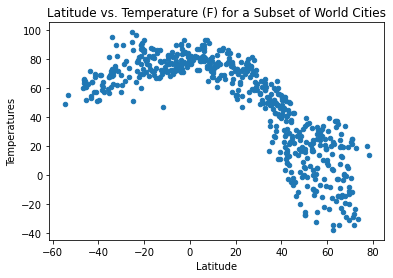

In [30]:
weather_df.plot(kind = "scatter", x = "Latitude", y = "Temperatures", title="Latitude vs. Temperature (F) for a Subset of World Cities")

In [31]:
##Latitude vs Temperature plot
correlation_matrix = np.corrcoef(weather_df.Latitude, weather_df.Temperatures)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared = round(r_squared,2)
print(f"The latitude vs. temperature plot is a curvlinear (inverted U) relationship with a r^2 value of {r_squared}, which exhibits a moderate correlation")

The latitude vs. temperature plot is a curvlinear (inverted U) relationship with a r^2 value of 0.59, which exhibits a moderate correlation


## Latitude vs. Humidity Plot

<AxesSubplot:title={'center':'Latitude vs. Humidity (%) for a Subset of World Cities'}, xlabel='Latitude', ylabel='Humidity'>

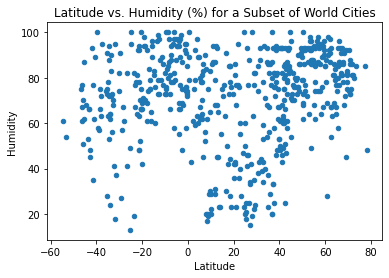

In [32]:
weather_df.plot(kind = "scatter", x = "Latitude", y = "Humidity", xlabel="Latitude", ylabel="Humidity", title="Latitude vs. Humidity (%) for a Subset of World Cities")

In [47]:
correlation_matrix = np.corrcoef(weather_df.Latitude, weather_df.Humidity)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared = round(r_squared,2)
print(f"The latitude vs. humidity plot has no correlation. It has a r_squared value of {r_squared}.")

The latitude vs. humidity plot has no correlation. It has a r_squared value of 0.02.


## Latitude vs. Cloudiness Plot

<AxesSubplot:title={'center':'Latitude vs. Cloudiness for a Subset of World Cities'}, xlabel='Latitude', ylabel='Cloudiness'>

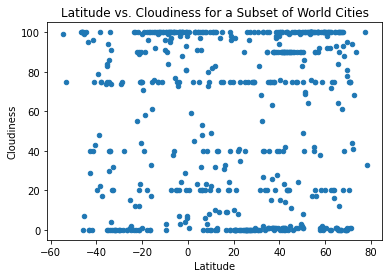

In [41]:
weather_df.plot(kind = "scatter", x = "Latitude", y = "Cloudiness", xlabel="Latitude", ylabel="Cloudiness", title="Latitude vs. Cloudiness for a Subset of World Cities")

In [43]:
correlation_matrix = np.corrcoef(weather_df.Latitude, weather_df.Cloudiness)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared = round(r_squared,2)
print(f"The latitude vs. cloudiness plot has no correlation. It has a r_squared value of {r_squared}.")

The latitude vs. cloudiness plot has no correlation. It has a r_squared value of 0.0.


## Latitude vs. Wind Speed Plot

<AxesSubplot:title={'center':'Latitude vs. Windiness for a Subset of World Cities'}, xlabel='Latitude', ylabel='Windiness'>

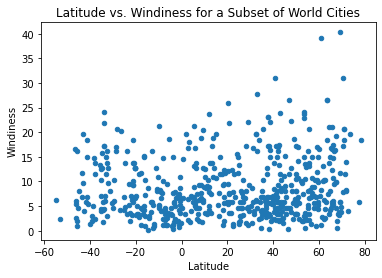

In [45]:
weather_df.plot(kind = "scatter", x = "Latitude", y = "Windiness", xlabel="Latitude", ylabel="Windiness", title="Latitude vs. Windiness for a Subset of World Cities")

In [48]:
print(f"The cluster of data points are scattered towards the bottom of the scatter plot. Windiness seems to be constant throughout the latitudes")

The cluster of data points are scattered towards the bottom of the scatter plot. Windiness seems to be constant throughout the latitudes


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression